In [2]:
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC

import models as models

In [3]:
# Загрузка данных
file_path = 'heart.csv'
data = models.load_data_csv(file_path)

Данные успешно загружены.


In [ ]:
'''age - возраст
sex - пол - (1 = мужчина; 0 = женщина)
cp - тип боли в груди (4 values)
trestbps - артериальное давление в состоянии покоя (в мм рт. ст. при поступлении в больницу)
chol - холестерин сыворотки в мг/дл
fbs - (уровень сахара в крови натощак > 120 мг/дл) (1 = правда; 0 = ложь)
restecg - результаты электрокардиографии в состоянии покоя
thalach - максимальная частота сердечных сокращений достигнута
exang - стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
oldpeak - Депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
slope - наклон пиковой нагрузки сегмента ST
ca - количество крупных сосудов (0-3), окрашенных флюороскопией
thal - 0 = нормальный; 1 = фиксированный дефект; 2 = обратимый дефект'''

In [4]:
# Просмотр данных
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
len(data)

1025

In [6]:
# Информация по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# просмотр выбросов
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

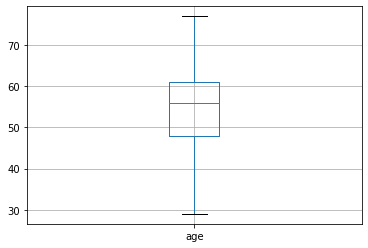

In [8]:
data.boxplot(column=['age'])

<AxesSubplot:>

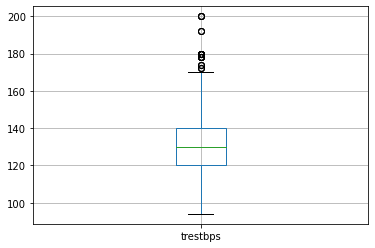

In [9]:
# есть выбросы
data.boxplot(column=['trestbps'])

<AxesSubplot:>

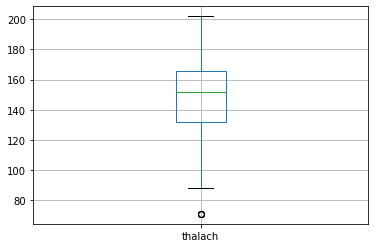

In [10]:
# есть выбросы
data.boxplot(column=['thalach'])

<AxesSubplot:>

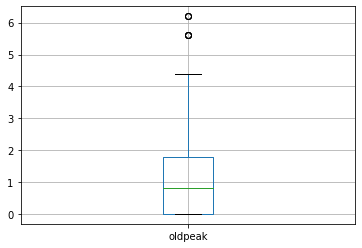

In [11]:
# есть выбросы
data.boxplot(column=['oldpeak'])

<AxesSubplot:>

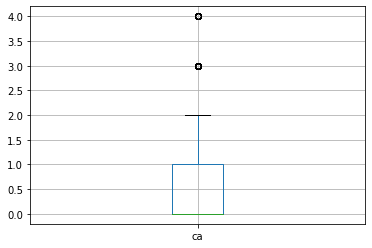

In [12]:
# есть выбросы
data.boxplot(column=['ca'])

In [13]:
from scipy import stats

# Вычисление Z-отклонения
z_deviations = np.abs(stats.zscore(data))

# Исключение выбросов
data_clean_z = data[(z_deviations < 3).all(axis=1)]
data_clean_z['target_name'] = data_clean_z['target'].apply(lambda x: 'Есть заболевание' if x == 1 else 'Нет заболевания')

C:\Users\user\AppData\Local\Temp\ipykernel_20200\1190196040.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_z['target_name'] = data_clean_z['target'].apply(lambda x: 'Есть заболевание' if x == 1 else 'Нет заболевания')


In [14]:
# просмотр выбрасов
data_clean_z.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,969.000000,969.000000,969.000000,969.00000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,54.417957,0.701754,0.948400,130.98968,244.467492,0.143447,0.532508,149.308566,0.337461,1.034572,1.398349,0.681115,2.325077,0.518060
std,9.074174,0.457724,1.035237,16.94101,46.125807,0.350709,0.529332,22.590880,0.473088,1.092665,0.608342,0.929578,0.593178,0.499932
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.00000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.00000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


In [15]:
# проверка на наличие пустых значений, но поскольку пустых нет, то функция по заполнения пустых не используется
models.null_data(data_clean_z)

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
target         0
target_name    0
dtype: int64

In [16]:
data_cleann = data_clean_z.drop(['target', 'target_name', 'thal'], axis=1)

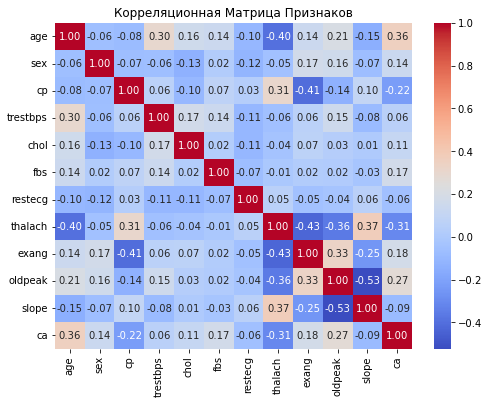


Корреляционная Матрица:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.063226 -0.082524  0.299354  0.157851  0.140981   
sex      -0.063226  1.000000 -0.070775 -0.063779 -0.133042  0.019120   
cp       -0.082524 -0.070775  1.000000  0.060307 -0.100115  0.072089   
trestbps  0.299354 -0.063779  0.060307  1.000000  0.171248  0.137395   
chol      0.157851 -0.133042 -0.100115  0.171248  1.000000  0.023408   
fbs       0.140981  0.019120  0.072089  0.137395  0.023408  1.000000   
restecg  -0.102600 -0.119304  0.032302 -0.105673 -0.105022 -0.069059   
thalach  -0.397550 -0.049919  0.306804 -0.058343 -0.039065 -0.012407   
exang     0.139033  0.168636 -0.411055  0.060408  0.069731  0.019996   
oldpeak   0.207588  0.156732 -0.135763  0.152521  0.029494  0.015028   
slope    -0.149751 -0.066846  0.097464 -0.084773  0.005666 -0.029565   
ca        0.355560  0.135143 -0.224388  0.055400  0.106743  0.170074   

           restecg   thalach     exang

In [38]:
# Методы выбора признаков.
# Фильтрационные Методы (Filter Methods)

X = pd.DataFrame(data_cleann)
y = pd.Series(data_clean_z.target, name='target')

try:
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Нормализация данных
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Создание DataFrame из масштабированных данных для удобства
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

    # Фильтрационные Методы (Filter Methods)
    # Корреляционная Матрица
    corr_matrix = X_train_scaled_df.corr()

    # Визуализация корреляционной матрицы
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Корреляционная Матрица Признаков')
    plt.show()

    # Анализ корреляционной матрицы
    print("\nКорреляционная Матрица:")
    print(corr_matrix)

    # Определение порога корреляции для выявления высококоррелированных признаков
    threshold = 0.75

    # Поиск пар признаков с высокой корреляцией
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
        


    if high_corr_pairs == []:
        print(f"\nНет признаков выше {threshold}")
    else:
        print(f"\nПары признаков с корреляцией выше {threshold}:")
        for pair in high_corr_pairs:
            print(pair)

    # Все признаки в датасете плохо скоррелированы 

    # Модель с полным набором признаков - чтобы посмотреть насколько хорошо модель может обучится (слишком низкое значение accuracy и большое количество ошибок)
    model_full = LogisticRegression(max_iter=200, random_state=42)
    model_full.fit(X_train_scaled, y_train)
    y_pred_full = model_full.predict(X_test_scaled)

    print("\nОтчет классификации для модели с полным набором признаков:")
    print(classification_report(y_test, y_pred_full))

    print("Матрица ошибок для модели с полным набором признаков:")
    print(confusion_matrix(y_test, y_pred_full))

except Exception as e:
    logger.exception(f"Ошибка: {e}")


In [18]:
# Sequential Feature Selection (Последовательный отбор признаков)

X = pd.DataFrame(data_cleann)
y = pd.Series(data_clean_z.target, name='target')

try:
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Модель для оценки признаков
    model = LogisticRegression(max_iter=200)

    # Sequential Feature Selector
    sfs = SequentialFeatureSelector(model, n_features_to_select=3, direction='forward')
    sfs.fit(X_train, y_train)

    # Трансформация данных
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    # Обучение и оценка модели на выбранных признаках
    model.fit(X_train_sfs, y_train)
    y_pred = model.predict(X_test_sfs)

    # Оценка модели
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))

except Exception as e:
    logger.exception(f"Ошибка: {e}")
 


              precision    recall  f1-score   support

           0       0.77      0.77      0.77        93
           1       0.79      0.78      0.79       101

    accuracy                           0.78       194
   macro avg       0.78      0.78      0.78       194
weighted avg       0.78      0.78      0.78       194



Accuracy: 0.7783505154639175
Матрица Признаков:
 [[72 21]
 [22 79]]
Отчет классификации:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.97      0.98       101

    accuracy                           0.98       194
   macro avg       0.98      0.99      0.98       194
weighted avg       0.99      0.98      0.98       194

Важность признаков:
Признак 11, важность: 0.1705924001059616
Признак 7, важность: 0.12942960103883533
Признак 2, важность: 0.11939463790582361
Признак 9, важность: 0.11034476754542859
Признак 0, важность: 0.10767861426871267
Признак 4, важность: 0.08995584029378295
Признак 3, важность: 0.0761440217948683
Признак 8, важность: 0.0649694718167284
Признак 10, важность: 0.05603424960913216
Признак 1, важность: 0.046464653254305134
Признак 6, важность: 0.019256646116263702
Признак 5, важность: 0.009735096250157543


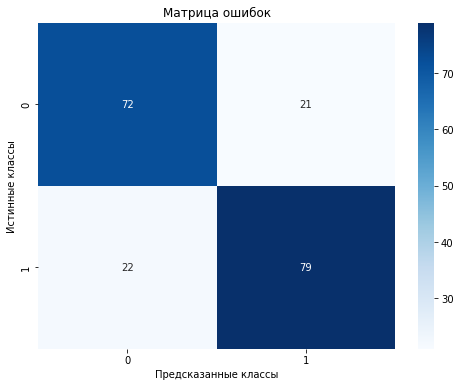

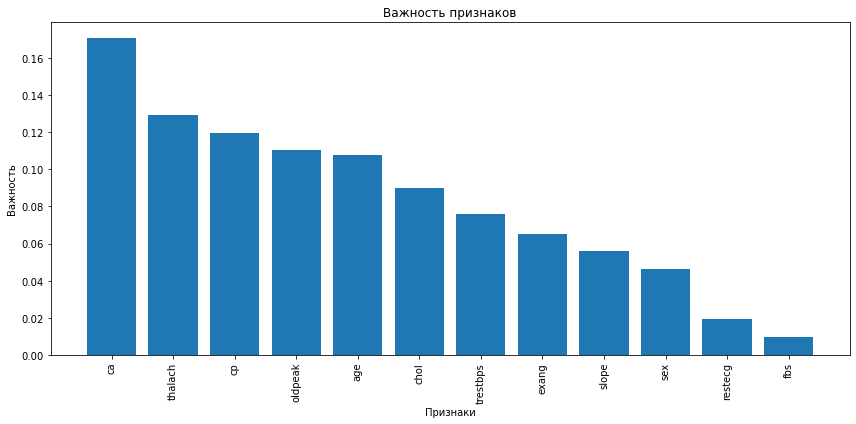

In [19]:
# Использование Деревьев Решений

X = data_cleann
y = data_clean_z.target

try:
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Модель случайного леса
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)

    # Оценим качество модели
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Матрица Признаков:\n", conf_matrix)

    # Предсказание и оценка модели
    y_pred = rf.predict(X_test)
    print("Отчет классификации:")
    print(classification_report(y_test, y_pred))

    # Вывод важности признаков
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("Важность признаков:")
    for idx in indices:
        print(f"Признак {idx}, важность: {importances[idx]}")

    # После обучения можно сказать что модель обучилась хорошо и выдеделить первые 4 признака (11, 7, 2 и 9)


    # Визуализация матрицы ошибок
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.title('Матрица ошибок')
    plt.show()

    # Визуализация важности признаков
    cols = [col for col in data_clean_z.columns if col not in ("target")]
    plt.figure(figsize=(12,6))
    plt.title("Важность признаков")
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), np.array(cols)[indices], rotation=90)
    plt.xlabel('Признаки')
    plt.ylabel('Важность')
    plt.tight_layout()
    plt.show()


except Exception as e:
    logger.exception(f"Ошибка: {e}")
      


In [20]:
# Градиентный бустинг
X = data_cleann
y = data_clean_z.target

try:
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Создание модели Gradient Boosting Classifier
    gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)

    # Обучение модели на обучающем наборе данных
    gb_classifier.fit(X_train, y_train)

    # Предсказание классов на тестовом наборе данных
    y_pred = gb_classifier.predict(X_test)

    # Вывод полного отчета
    report = classification_report(y_test, y_pred)
    print(report)

except Exception as e:
    logger.exception(f"Ошибка: {e}")
      

# на данном примере можно понять что модель переобучена, попробуем проверить тот же метод, но с меньшей глубиной дерева

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       105

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



In [21]:
# Градиентный бустинг
X = data_cleann
y = data_clean_z.target

try:
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Создание модели Gradient Boosting Classifier
    gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

    # Обучение модели на обучающем наборе данных
    gb_classifier.fit(X_train, y_train)

    # Предсказание классов на тестовом наборе данных
    y_pred = gb_classifier.predict(X_test)

    # Вывод полного отчета
    accuracy_GradientBoosting = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy_GradientBoosting}')
    report = classification_report(y_test, y_pred)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

except Exception as e:
    logger.exception(f"Ошибка: {e}")
       

# Модель не переобучилась и данные можно использовать (также исходя из матрицы можно сказать что в 1 случая модель ошиблась в 2 случаях, а во 2 в 4)

Accuracy: 0.9690721649484536
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.98      0.96      0.97       101

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194

Confusion Matrix:
 [[91  2]
 [ 4 97]]


In [22]:
# Градиентный бустинг
X = data_cleann
y = data_clean_z.target

try:
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Создание модели Gradient Boosting Classifier
    gb_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)

    # Обучение модели на обучающем наборе данных
    gb_classifier.fit(X_train, y_train)

    # Предсказание классов на тестовом наборе данных
    y_pred = gb_classifier.predict(X_test)

    # Вывод полного отчета
    accuracy_GradientBoosting = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy_GradientBoosting}')
    report = classification_report(y_test, y_pred)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

except Exception as e:
    logger.exception(f"Ошибка: {e}")
       

# Вот пример как можно уйти от переобучения с помощи строчки stratify=y

Accuracy: 0.9845360824742269
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.97      0.98       101

    accuracy                           0.98       194
   macro avg       0.98      0.99      0.98       194
weighted avg       0.99      0.98      0.98       194

Confusion Matrix:
 [[93  0]
 [ 3 98]]


In [23]:
# Для снижения возможности переобучения использую CatBoost

X = data_cleann
y = data_clean_z.target

try:
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Создание модели CatBoostClassifier
    clf = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.2, loss_function='MultiClass', random_state=42)

    # Обучение модели на обучающем наборе данных
    clf.fit(X_train, y_train)

    # Предсказание классов на тестовом наборе данных
    y_pred = clf.predict(X_test)


    # Вывод отчета
    accuracy_CatBoost = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy_CatBoost}')
    print('Classification Report:')
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

except Exception as e:
    logger.exception(f"Ошибка: {e}")
       

# Видно что данная модель аналогична градиентному бустингу

0:	learn: 0.6077590	total: 196ms	remaining: 19.4s
1:	learn: 0.5491269	total: 212ms	remaining: 10.4s
2:	learn: 0.4905356	total: 232ms	remaining: 7.49s
3:	learn: 0.4454753	total: 253ms	remaining: 6.06s
4:	learn: 0.4068692	total: 265ms	remaining: 5.04s
5:	learn: 0.3730494	total: 286ms	remaining: 4.49s
6:	learn: 0.3407413	total: 303ms	remaining: 4.03s
7:	learn: 0.3167241	total: 319ms	remaining: 3.67s
8:	learn: 0.3025854	total: 320ms	remaining: 3.23s
9:	learn: 0.2845810	total: 320ms	remaining: 2.88s
10:	learn: 0.2674631	total: 341ms	remaining: 2.75s
11:	learn: 0.2502551	total: 353ms	remaining: 2.59s
12:	learn: 0.2373396	total: 366ms	remaining: 2.45s
13:	learn: 0.2221755	total: 375ms	remaining: 2.31s
14:	learn: 0.2090068	total: 385ms	remaining: 2.18s
15:	learn: 0.1977820	total: 394ms	remaining: 2.07s
16:	learn: 0.1871658	total: 404ms	remaining: 1.97s
17:	learn: 0.1780695	total: 414ms	remaining: 1.88s
18:	learn: 0.1693618	total: 422ms	remaining: 1.8s
19:	learn: 0.1597969	total: 431ms	remainin

In [31]:
# ExtraTreesClassifier

X = data_cleann
y = data_clean_z.target

try:
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Создание и обучение классификатора Extra Trees
    clf = ExtraTreesClassifier(n_estimators=100, max_features=4, random_state=42)
    clf.fit(X_train, y_train)

    # Прогнозирование и оценка точности
    y_pred = clf.predict(X_test)

    # Вывод метрик классификации
    report = classification_report(y_test, y_pred)

    accuracy_ExtraTreesClassifier = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy_ExtraTreesClassifier}')
    print('Classification Report:')
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

except Exception as e:
    logger.exception(f"Ошибка: {e}")
   

# Видно что данная модель аналогична градиентному бустингу

Accuracy: 0.9845360824742269
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.97      0.98       101

    accuracy                           0.98       194
   macro avg       0.98      0.99      0.98       194
weighted avg       0.99      0.98      0.98       194

Confusion Matrix:
 [[93  0]
 [ 3 98]]


In [25]:
# Квадратичный дискриминантный анализ

X = data_cleann
y = data_clean_z.target

try:
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Создание модели QDA
    qda_classifier = QuadraticDiscriminantAnalysis()

    # Обучение модели на обучающем наборе данных
    qda_classifier.fit(X_train, y_train)

    # Предсказание классов на тестовом наборе данных
    y_pred = qda_classifier.predict(X_test)

    # Оценка производительности модели
    accuracy_Quadratic = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy_Quadratic}')

    # Вывод полного отчета
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

except Exception as e:
    logger.exception(f"Ошибка: {e}")
       

# Видно что по сравнению с градиентным бустингом accuracy упало, а также увеличилось количество неверно ошибок в 0 и 1 классе

Accuracy: 0.8247422680412371
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        93
           1       0.81      0.86      0.84       101

    accuracy                           0.82       194
   macro avg       0.83      0.82      0.82       194
weighted avg       0.83      0.82      0.82       194

Confusion Matrix:
 [[73 20]
 [14 87]]


In [26]:
# Decision Tree Classifier

X = data_cleann
y = data_clean_z.target

try:
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Создание и обучение модели Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Предсказание классов на тестовом наборе данных
    y_pred = dt_classifier.predict(X_test)

    # Оценка производительности модели
    accuracy_Decision = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy_Decision}')

    # Вывод полного отчета
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

except Exception as e:
    logger.exception(f"Ошибка: {e}")
      

# Видно что данная модель аналогична градиентному бустингу

Accuracy: 0.9845360824742269
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.97      0.98       101

    accuracy                           0.98       194
   macro avg       0.98      0.99      0.98       194
weighted avg       0.99      0.98      0.98       194

Confusion Matrix:
 [[93  0]
 [ 3 98]]


In [33]:
# Экстремальный градиентный бустинг xgboost

X = data_cleann
y = data_clean_z.target

try:
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Создание и обучение модели XGBoost
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)

    # Оценка модели
    y_pred = model.predict(X_test)

    # Оценка производительности модели
    accuracy_xgboost = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy_xgboost}')

    # Вывод полного отчета
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
        
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

except Exception as e:
    logger.exception(f"Ошибка: {e}")
      

# Если отдать на обучение не 20%, то модель будет аналогична градиентному бустингу, а если отдать 30% то Accuracy улучшится

Accuracy: 0.9896907216494846
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       140
           1       1.00      0.98      0.99       151

    accuracy                           0.99       291
   macro avg       0.99      0.99      0.99       291
weighted avg       0.99      0.99      0.99       291

Confusion Matrix:
 [[140   0]
 [  3 148]]


C:\Users\user\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:11:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [35]:
# svm

X = data_cleann
y = data_clean_z.target

try:
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Создание и обучение модели SVM
    svm_model = SVC(kernel='poly', random_state=42) 
    svm_model.fit(X_train, y_train)

    # Оценка производительности модели
    accuracy_svm = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy_svm}')

    # Вывод полного отчета
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
except Exception as e:
    logger.exception(f"Ошибка: {e}")
    return None   

# Результат аналогичен с Decision Tree Classifier

Accuracy: 0.9896907216494846
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       140
           1       1.00      0.98      0.99       151

    accuracy                           0.99       291
   macro avg       0.99      0.99      0.99       291
weighted avg       0.99      0.99      0.99       291

Confusion Matrix:
 [[140   0]
 [  3 148]]


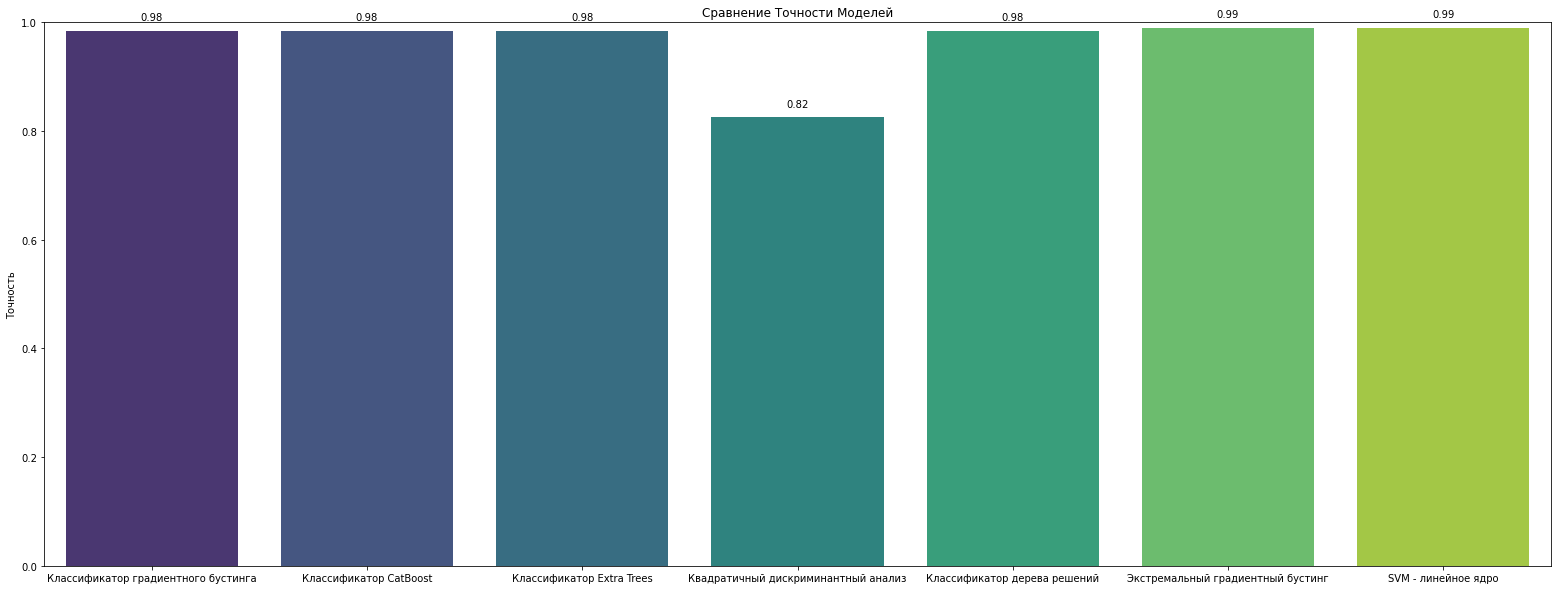

In [36]:
# Визуализация сравнения точности моделей
models = ['Классификатор градиентного бустинга', 'Классификатор CatBoost', 'Классификатор Extra Trees', 'Квадратичный дискриминантный анализ', 'Классификатор дерева решений', 'Экстремальный градиентный бустинг', 'SVM - линейное ядро']
accuracies = [accuracy_GradientBoosting, accuracy_CatBoost, accuracy_ExtraTreesClassifier, accuracy_Quadratic, accuracy_Decision, accuracy_xgboost, accuracy_svm]

plt.figure(figsize=(27, 10))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.ylabel('Точность')
plt.title('Сравнение Точности Моделей')
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center')
plt.show()

In [ ]:
'''
Итог:

Среди всех метрик я выбрала Экстремальный градиентный бустинг и SVM - линейное ядро, 
но при условии что модель обучается на 30% выборки, поскольку у данных моделей самое большое accuracy и модели ошибаются 
только 3 раза для 1 класса (т.е. модель сказала что нет заболевания, хотя оно есть)

Причины почему я не выбрала Классификаторы с Accuracy = 0.98, поскольку accuracy меньше, но в остальном модели схожи

'''